In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import acquire as a
import prepare as p

#ignore minor warnings
import warnings
warnings.filterwarnings("ignore")


In [31]:
df = a.get_data(query_url = False)
print(df.shape)
df = p.prepare_dataframe(df)
train, validate, test = p.split_data(df)
train.shape, validate.shape, test.shape

Found file in working directory!
(70932, 83)


((40311, 60), (6719, 60), (6719, 60))

# Question 1: Does the artist have any effect on the price of the card.

## Key takeaway
- The amount of cards created by and individual artist is not equal to the artist value. 
- In the charts artist Jon Avon created the most cards but the artist Christopher Rush created the most expensive card(Black Lotus)


## Discusion
While some artist have created more cards then others, it appears that the amount of cards created is not equal to the value of the cards.

## Visualization

It looks like the mid '90s, just before '00, and post-'20 might have higher prices



In [32]:
# show only data from the selected columns
df2 = train[['name', 'set_type', 'artist', 'rarity', 'usd', 'collector_number']]




In [33]:
# Rarity card count
df2.rarity.value_counts()

common      15167
rare        11990
uncommon    11055
mythic       1910
special       189
Name: rarity, dtype: int64

<AxesSubplot:>

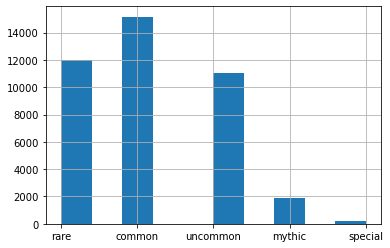

In [34]:
# Count of cards by rarity
df2.rarity.hist()

<AxesSubplot:>

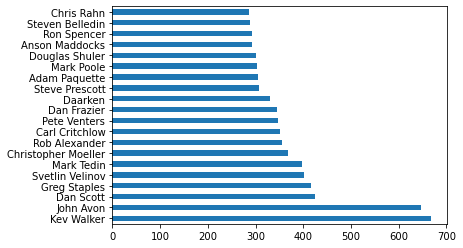

In [35]:
# Top 20 artist who created the most cards
df2['artist'].value_counts()[:20].plot(kind='barh')

In [38]:
# shows only data from top 100 cards grouped by highest value.
df3 = df2.loc[:,'name':'collector_number'].sort_values(by=['usd'], ascending=False,)[:100]

In [39]:
df3.head()

,name,set_type,artist,rarity,usd,collector_number
12737,Ancestral Recall,core,Mark Poole,rare,6999.99,48
47092,Tropical Island,core,Jesper Myrfors,rare,6000.00,283
497,Timetwister,core,Mark Tedin,rare,5732.99,85
27959,The Tabernacle at Pendrell Vale,expansion,Nicola Leonard,rare,3888.00,307
31249,Mox Jet,core,Dan Frazier,rare,3099.99,263


<AxesSubplot:>

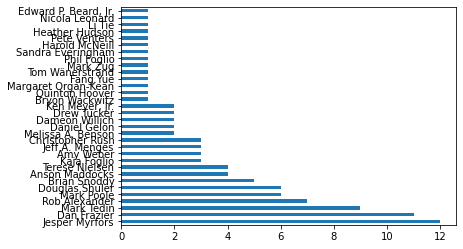

In [40]:
# Plot top 100 cards and artist by amount of cards created
df3['artist'].value_counts().plot(kind='barh')

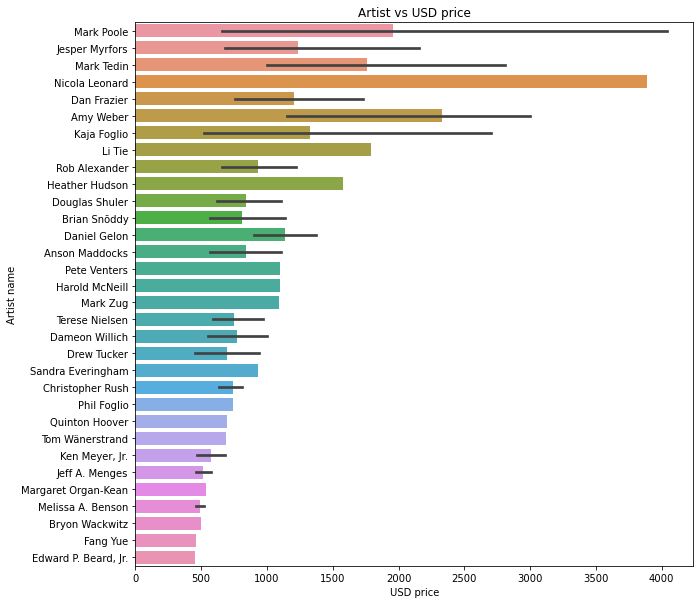

In [41]:
# Bar plor to show Artist and USD price, for top artist
def vis_artist_by_usd(df3):
    plt.figure(figsize=(10,10))
    sns.barplot(data=df3, x='usd', y='artist')
    plt.title('Artist vs USD price')
    plt.xlabel('USD price')
    plt.ylabel('Artist name')
    plt.show()

vis_artist_by_usd(df3)



In [42]:
df.rarity.value_counts()

common      20294
rare        16059
uncommon    14595
mythic       2554
special       247
Name: rarity, dtype: int64

## Hypothesis Testing 1


H0: The total amount of cards created by artist x is = to the value of cards there cards
 
Ha: The total amount of cards created by artist x is not = to the value of cards there cards
 

In [43]:
def hypothesis_artist_usd(df, alpha = 0.05):
    artist_count = df['artist'].unique().tolist()
    outputs = []
    for artist_name in artist_count:
        usd_sample = df[(df['artist'] == artist_name) & (df.usd > 0.01)]['usd']
        overall_mean = df['usd'].mean()
        t, p = stats.ttest_1samp(usd_sample, overall_mean)
        output = {
            'artist':artist_name,
            'price':usd_sample.max(),
            't_stat':t,
            'p_value':p,
            'reject_null': t > 0 and p/2 < alpha
        }
        outputs.append(output)
    return pd.DataFrame(outputs)

hypothesis_artist_usd(train).sort_values('reject_null', ascending = False).sort_values(by=['price'], ascending=False,)[:10]


,artist,price,t_stat,p_value,reject_null
107,Mark Poole,6999.99,1.995850,0.046848,True
52,Jesper Myrfors,6000.00,3.043059,0.002663,True
17,Mark Tedin,5732.99,2.876450,0.004240,True
321,Nicola Leonard,3888.00,1.010347,0.325024,False
248,Dan Frazier,3099.99,3.198799,0.001508,True
132,Amy Weber,2999.00,2.297823,0.023033,True
151,Kaja Foglio,2700.00,1.582829,0.116683,False
434,Li Tie,1787.50,1.018609,0.365986,False
25,Rob Alexander,1698.99,2.974382,0.003137,True
148,Heather Hudson,1578.94,0.286735,0.774554,False


In [44]:
train['artist'].value_counts()['Gao Yan']


13

# Question 2: Does the Rarity of the card have any affect on the card price?


## Key takeaway

- The rarity of cards is not the total indicator of to price. 
- In the charts while uncommon there are some none rare card in the high value price range.

## Discusion
Rarity of the card and Artist have no affect on card price. Will need more information in the future to see if higher price cards are more affected by tournament play and age of card.



## Visualization

Rarity of the cards has some --- on the value of the card more analysis more information is need to tell if it is a predictor of the card price.

## Hypothesis Testing 2 (T-test)
H
0
: The mean price in USD of cards is equal to the rarity of the cards.

H
a
: The mean price in USD of cards is NOT equal to the rarity of the cards.




<AxesSubplot:xlabel='count', ylabel='rarity'>

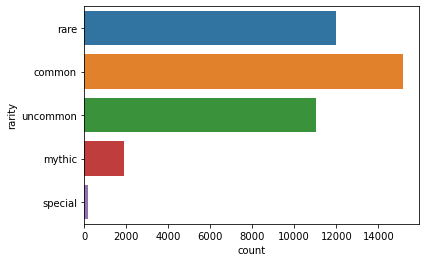

In [45]:
# Card count by Rarity
sns.countplot(data= train, y='rarity')

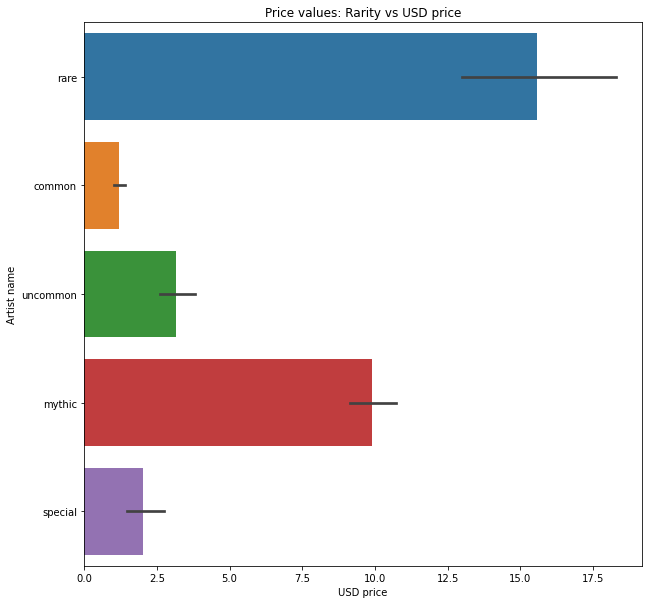

In [46]:
# Median price for all cards based on Rarity and USD price
def vis_rarity_by_usd(df):
    plt.figure(figsize=(10,10))
    sns.barplot(data=train, x='usd', y='rarity')
    plt.title('Price values: Rarity vs USD price')
    plt.xlabel('USD price')
    plt.ylabel('Artist name')
    plt.show()

vis_rarity_by_usd(df)

<AxesSubplot:>

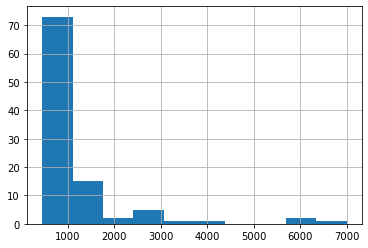

In [47]:
# Card count by Rarity
df3.usd.hist()

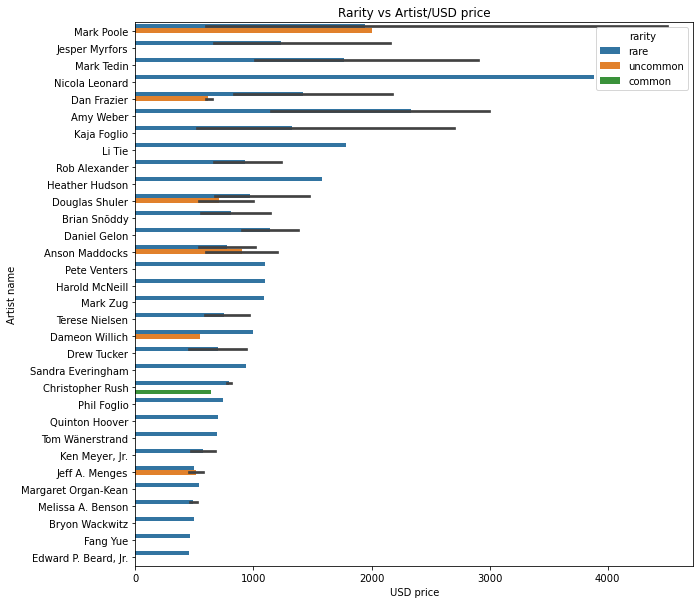

In [48]:
# Bar plot to show Artist, USD price and rarity of cards for top artist
def vis_artist_by_usd(df3):
    plt.figure(figsize=(10,10))
    sns.barplot(data=df3, x='usd', y='artist', hue='rarity')
    plt.title('Rarity vs Artist/USD price')
    plt.xlabel('USD price')
    plt.ylabel('Artist name')
    plt.show()

vis_artist_by_usd(df3)

In [49]:
def hypothesis_rarity_usd(df, alpha = 0.05):
    rarity_count = df['rarity'].unique().tolist()
    outputs = []
    for rarity_type in rarity_count:
        usd_sample = df[(df['rarity'] == rarity_type) & (df.usd > 0.01)]['usd']
        overall_mean = df['usd'].mean()
        t, p = stats.ttest_1samp(usd_sample, overall_mean)
        output = {
            'rarity':rarity_type,
            'price':usd_sample.max(),
            't_stat':t,
            'p_value':p,
            'reject_null': t > 0 and p/2 < alpha
        }
        outputs.append(output)
    return pd.DataFrame(outputs)

hypothesis_rarity_usd(train).sort_values('reject_null', ascending = False)

,rarity,price,t_stat,p_value,reject_null
0,rare,6999.99,6.880340,6.268076e-12,True
3,mythic,272.10,8.340388,1.399365e-16,True
1,common,639.50,-53.982478,0.000000e+00,False
2,uncommon,2000.50,-10.345039,5.742064e-25,False
4,special,57.17,-12.762881,2.837613e-27,False


# Question 3: Does the set_type and rarity of the cards affect the price in USD?


## Key takeaway
- The set type and rarity of cards is not equal to price. 
- Some set types are older so we would have to evaluate the category to better understand this hypothesis. 

## Discusion
- While set type and rarity of the card do have some affect on the cards value more information is need to see if this determine the value.

From ANOVA analysis, we know that set_type differences are statistically significant, but ANOVA does not tell which set_type are significantly different from each other. To know the pairs of significant different treatments, we will perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.




## Visualization
Rarity of the cards has some --- on the value of the card more analysis more information is need to tell if it is a predictor of the card price.


In [50]:
# Cards value count to set_types
df.set_type.value_counts()

expansion           22211
core                 6780
masters              5620
commander            5475
draft_innovation     3910
duel_deck            1793
memorabilia          1473
promo                1434
box                  1341
token                 865
funny                 834
starter               820
planechase            645
archenemy             324
masterpiece           156
vanguard               28
spellbook              24
arsenal                16
Name: set_type, dtype: int64

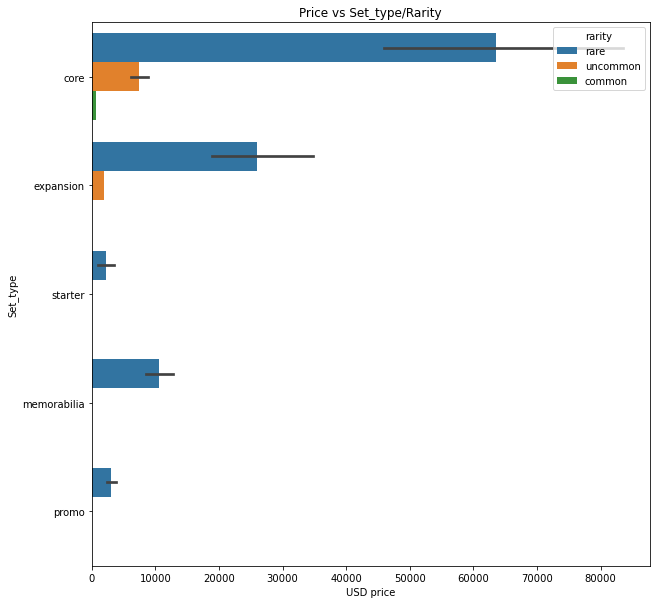

In [51]:
# top 100 cards: Set_type and Rarity 
def usd_rarity_set_type_total(df3):
    plt.figure(figsize=(10,10))
    sns.barplot(data=df3, x='usd', y='set_type', hue='rarity', estimator=sum)
    plt.title('Price vs Set_type/Rarity')
    plt.xlabel('USD price')
    plt.ylabel('Set_type')
    plt.show()

usd_rarity_set_type_total(df3)

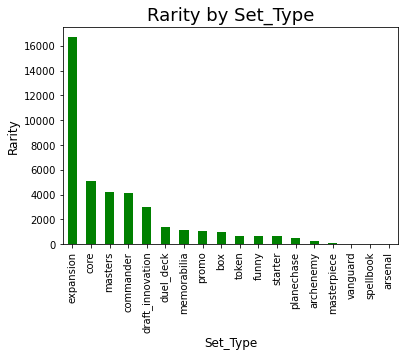

In [52]:
# Highest number of cards created by set_type
train['set_type'].value_counts().plot(kind='bar', color='g');
plt.title('Rarity by Set_Type', size=18)
plt.xlabel('Set_Type', size=12)
plt.ylabel('Rarity', size=12);

In [53]:
train.groupby('set_type')['usd'].mean().sort_values()


set_type
duel_deck            0.522703
token                0.773567
commander            1.148760
draft_innovation     1.697380
archenemy            1.737500
funny                1.757951
planechase           1.774938
masters              3.153206
spellbook            3.565333
box                  3.874924
expansion            4.179850
promo                8.742644
masterpiece          9.428264
arsenal             11.366250
starter             15.606082
memorabilia         22.074829
core                22.399403
vanguard            34.246364
Name: usd, dtype: float64

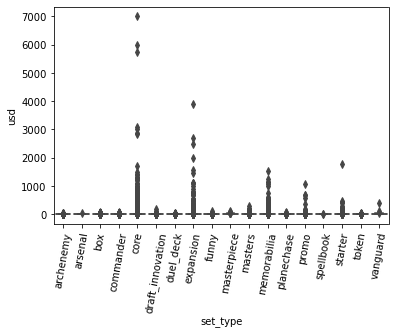

In [67]:
settype_profit=train[['set_type','usd']].sort_values('set_type').reset_index(level=0, drop=False)
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different genre

ax = sns.boxplot(x='set_type', y='usd', data=settype_profit)
plt.xticks(rotation=80)

plt.show()

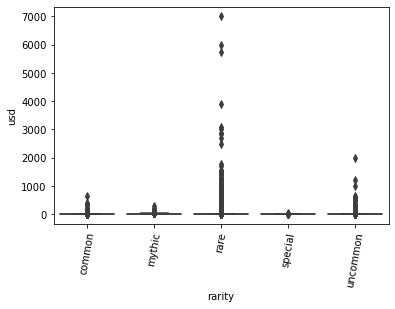

In [68]:
rarity_count=train[['rarity','usd']].sort_values('rarity').reset_index(level=0, drop=False)
# generate a boxplot to see the data distribution by treatments. Using boxplot, we can 
# easily detect the differences between different genre

ax = sns.boxplot(x='rarity', y='usd', data=rarity_count)
plt.xticks(rotation=80)

plt.show()

## Hypothesis Testing 3 (ANOVA)
H
0
: The set_type and rarity of cards is equel to the mean price in USD of cards.

H
a
: The set_type and rarity of cards is NOT equel to the mean price in USD of cards.



In [56]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('usd ~ C(set_type)', data=settype_profit).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(set_type),2.055388e+06,17.0,18.243679,1.549358e-55
Residual,2.670312e+08,40293.0,NaN,NaN


In [57]:
# Set type display model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    usd   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     18.24
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.55e-55
Time:                        08:45:02   Log-Likelihood:            -2.3454e+05
No. Observations:               40311   AIC:                         4.691e+05
Df Residuals:                   40293   BIC:                         4.693e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [58]:
# Ordinary Least Squares (OLS) model
model = ols('usd ~ C(rarity)', data=rarity_count).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(rarity),1.557350e+06,4.0,58.657637,1.857316e-49
Residual,2.675292e+08,40306.0,NaN,NaN


In [59]:
# Rarity display model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usd   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     58.66
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           1.86e-49
Time:                        08:45:04   Log-Likelihood:            -2.3457e+05
No. Observations:               40311   AIC:                         4.692e+05
Df Residuals:                   40306   BIC:                         4.692e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.21

- The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among set_type.

Note: When the ANOVA is significant, post hoc tests are used to see differences between specific groups. post hoc tests control the family-wise error rate (inflated type I error rate) due to multiple comparisons. Post hoc tests adjust the p values (Bonferroni correction) or critical value (Tukey's HSD test).

# Question 4: Is there a relationship between collector number and usd?

## Key takeaway
- More information on the collecters would be need to complete this H0. 
- Analyais from this data does seem to show that top collecters seem to collects mostly core and expansion cards.


## Discusion
While collectors seem to mostly collect core and expansion cards there is more information needed to tell they their collecting these cards over other set types. 


## Visualization
The Collector number and amount of cards collected by the top 20 collectors and the set types mostly collected.

In [61]:
# shows only data from top 100 cards grouped by highest value.
df4 = df3.loc[:,'name':'collector_number'].sort_values(by=['usd'], ascending=False,)[:20]

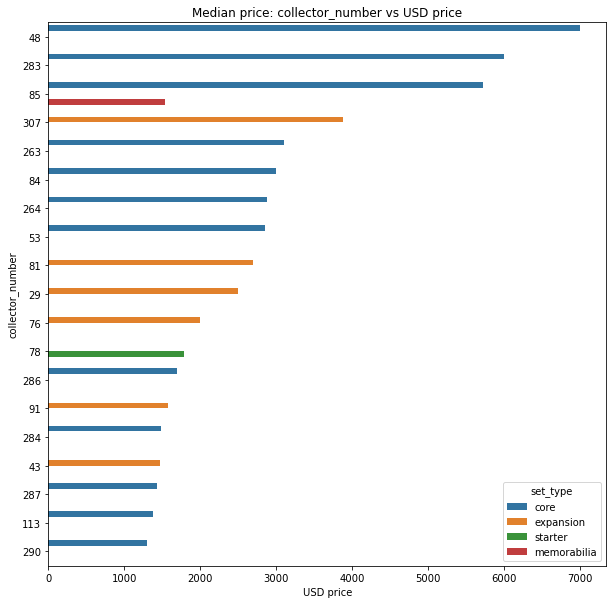

In [64]:
# Median price for all cards based on Rarity and USD price
def vis_rarity_by_usd(df4):
    plt.figure(figsize=(10,10))
    sns.barplot(data=df4, x='usd', y='collector_number', hue='set_type')
    plt.title('Median price: collector_number vs USD price')
    plt.xlabel('USD price')
    plt.ylabel('collector_number')
    plt.show()

vis_rarity_by_usd(df4)